# <b>1 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# <b>2 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [14]:
def load_image_from_url(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    return image

def preprocess_image(image):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image)
    image = image.unsqueeze(0)
    return image

# <b>3 <span style ='color:#0386f7de'>|</span> Building the model</b>

In [15]:
def load_model():
    model = models.alexnet(weights='DEFAULT')
    model.eval()
    return model

# <b>4 <span style ='color:#0386f7de'>|</span> Training the model</b>


In [16]:
def predict(image_url):
    image = load_image_from_url(image_url)
    image_tensor = preprocess_image(image)

    model = load_model()

    with torch.no_grad():
        output = model(image_tensor)

    _, predicted_idx = torch.max(output, 1)

    return image, predicted_idx.item()

# <b>5 <span style ='color:#0386f7de'>|</span> Model results</b>


Predicted class index: 367


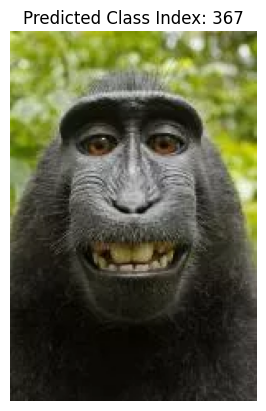

In [17]:
image_url = 'https://cyber.harvard.edu/sites/default/files/styles/image_thumbnail/public/800px-Macaca_nigra_self-portrait_%28rotated_and_cropped%29.jpg.webp?itok=MxG60Jnd'
loaded_image, predicted_class = predict(image_url)

print(f'Predicted class index: {predicted_class}')

plt.imshow(loaded_image)
plt.axis('off')
plt.title(f'Predicted Class Index: {predicted_class}')
plt.show()